In [3]:

## Import Libraries:
# Mathematical / Numerical Libraries:
import numpy as np
import random

# Plotting:
import matplotlib.pyplot as plt
import matplotlib
# %matplotlib inline  # use %matplotlib tk to get a popout window, requires PyQt5

# Type hinting:
from typing import List, Union, Tuple, Callable

# make numpy warnings act as errors:
np.seterr(all='raise')

import os
import sys

sys.path.append(f"{os.getcwd()}/..")  # hacky way to import library that exists in parent directory

In [7]:
from BuildYourOwnEmbedding import curves
from BuildYourOwnEmbedding.parameters import UniformRange, RandomRange


## Generating Sets of Curves quickly:

This example highlights four different ways that a parameter can be specified in the curve generation functions:
- Using a UniformRange
- Using a RandomRange
- Using a constant value
- Using a list of explicitly defined values

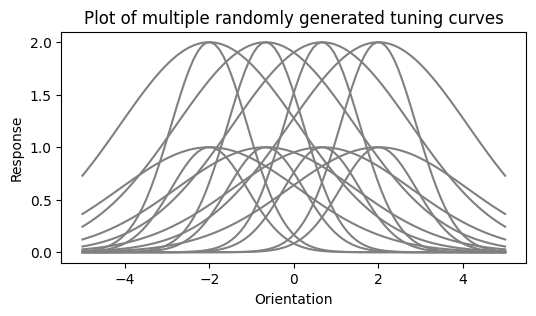

In [12]:
x = np.linspace(-5, 5, 100)
gaussianCurves = curves.generate_random_gaussian_curves(
    x = x,
    mu = UniformRange(minVal=-2, maxVal=2, n=4),        # range parameter from -2 to 2 with 4 evenly spaced data points
    sigma = RandomRange(minVal=0.5, maxVal=3, n=2),     # 2 random values between 0.5 and 3
    minResponse = 0,                                    # constant minimum response of 0
    maxResponse = [1, 2]                                # two explicitly defined values of maximum gaussian response   
)

fig: plt.Figure = plt.figure(figsize=(6,3))
for curve in gaussianCurves:
    plt.plot(x, curve, color="gray")
plt.xlabel(r"Orientation")
plt.ylabel(r"Response")
plt.title(r"Plot of multiple randomly generated tuning curves")
plt.show()

Similarly, for other curve types:

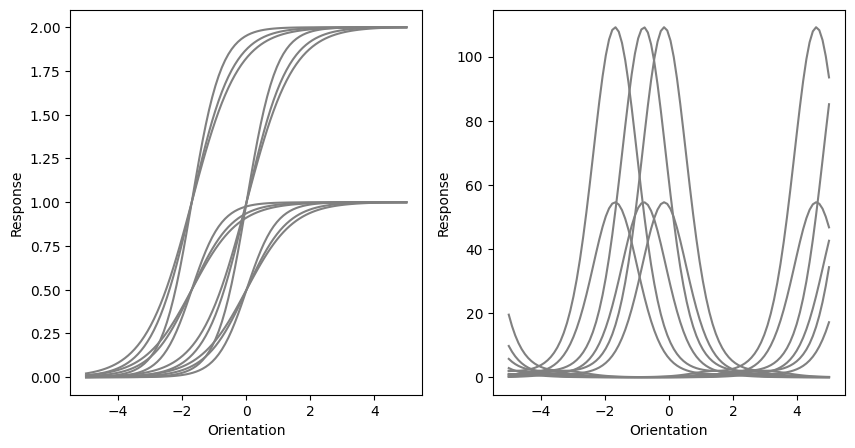

In [25]:
x = np.linspace(-5, 5, 100)
sigmoidCurves = curves.generate_random_sigmoid_curves(
    x = x,
    steepness = RandomRange(1, 3, 3),
    pivot = RandomRange(-2, 2, 2),
    minResponse = 0,
    maxResponse = [1, 2]
)
vonMisesCurves = curves.generate_random_von_mises_curves(
    x = x,    
    kappa = UniformRange(-2, 2, 2),
    theta = RandomRange(0.5, 3, 3),
    minResponse = 0,
    maxResponse = [1, 2]
)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
for curve in sigmoidCurves:
    ax1.plot(x, curve, color="gray")
    ax1.set_xlabel(r"Orientation")
    ax1.set_ylabel(r"Response")
for curve in vonMisesCurves:
    ax2.plot(x, curve, color="gray")
    ax2.set_xlabel(r"Orientation")
    ax2.set_ylabel(r"Response")
plt.show()